In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# 1. Cargar la base original
df = pd.read_csv('df_long.csv')

# 2. Crear la nueva base eliminando los ceros en Expectativa_Activa
df_expectativas = df[df['Expectativa_Activa'] != 0].copy()
df_exp_mant = df[df['Expectativa_Activa'] == 1].copy()
df_exp_rev = df[df['Expectativa_Activa'] == -1].copy()

# 3. Guardar la base filtrada
df_expectativas.to_csv('df_expectativas_filtrada.csv', index=False)

# Verificación rápida en consola
print(f"Base original: {len(df)} filas.")
print(f"Base filtrada (sin 0s): {len(df_expectativas)} filas.")
print(f"Sujetos que permanecen en el estudio: {df_expectativas['ID_Sujeto'].nunique()}")

Base original: 2196 filas.
Base filtrada (sin 0s): 1668 filas.
Sujetos que permanecen en el estudio: 111


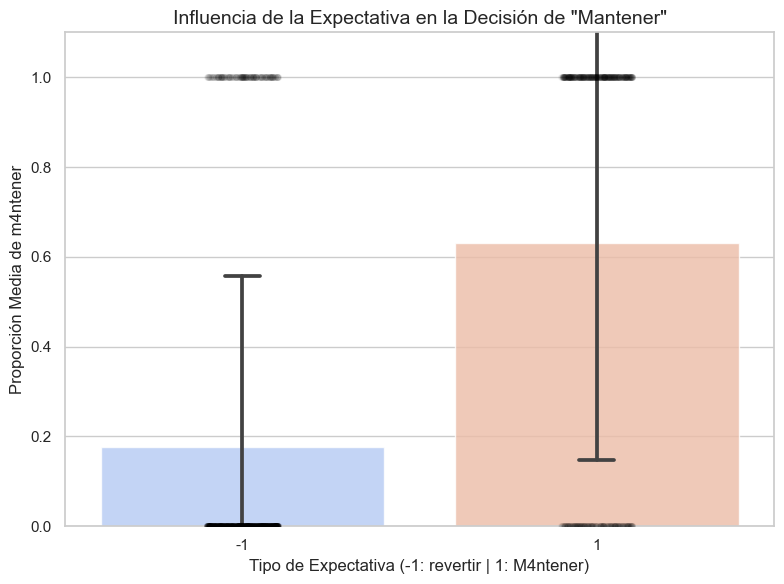

 Expectativa  N (Ensayos)  Media (Proporción)  Desv. Estándar
          -1         1068               0.176           0.381
           1          600               0.630           0.483


In [8]:
# Configurar el gráfico
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")

# Gráfico de barras: Comparamos la media de 'Mantiene' según la expectativa
# El color 'coolwarm' ayuda a asociar -1 (frío/negativo) y 1 (cálido/positivo)
sns.barplot(data=df_expectativas, x='Expectativa_Activa', y='Mantiene', 
            errorbar='sd', capsize=.1, palette='coolwarm', alpha=0.8)

# Añadir los puntos individuales para ver la densidad de las respuestas
sns.stripplot(data=df_expectativas, x='Expectativa_Activa', y='Mantiene', 
              color='black', alpha=0.05, jitter=True)

plt.title('Influencia de la Expectativa en la Decisión de "Mantener"', fontsize=14)
plt.ylabel('Proporción Media de m4ntener', fontsize=12)
plt.xlabel('Tipo de Expectativa (-1: revertir | 1: M4ntener)', fontsize=12)
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()

# 3. Generar la tabla de acompañamiento
tabla_resumen = df_expectativas.groupby('Expectativa_Activa')['Mantiene'].agg([
    'count', 
    'mean', 
    'std'
]).reset_index()

tabla_resumen.columns = ['Expectativa', 'N (Ensayos)', 'Media (Proporción)', 'Desv. Estándar']
print(tabla_resumen.round(3).to_string(index=False))

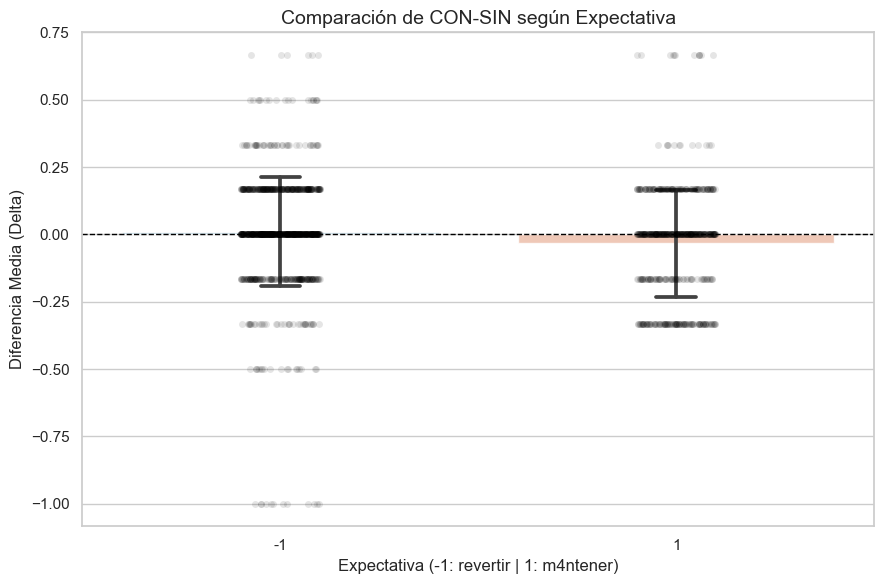

TABLA DE RESULTADOS - DELTA MANTIENE:
 Expectativa  N (Ensayos)  Media Delta  Desv. Estándar
          -1         1068        0.010           0.202
           1          600       -0.033           0.199


In [11]:
# 2. Configurar el gráfico
plt.figure(figsize=(9, 6))
sns.set_theme(style="whitegrid")

# Gráfico de barras para la media de Delta_Mantiene
# Usamos errorbar='sd' para ver la dispersión (Desviación Estándar)
sns.barplot(data=df_expectativas, x='Expectativa_Activa', y='Delta_Mantiene', 
            errorbar='sd', capsize=.1, palette='RdBu_r', alpha=0.8)

# Puntos individuales para observar la dispersión real de los datos
sns.stripplot(data=df_expectativas, x='Expectativa_Activa', y='Delta_Mantiene', 
              color='black', alpha=0.1, jitter=True)

# Personalización
plt.title('Comparación de CON-SIN según Expectativa', fontsize=14)
plt.ylabel('Diferencia Media (Delta)', fontsize=12)
plt.xlabel('Expectativa (-1: revertir | 1: m4ntener)', fontsize=12)

# Añadir una línea en 0 para identificar fácilmente aumentos o disminuciones
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

# 3. Generar tabla de datos
tabla_delta = df_exp.groupby('Expectativa_Activa')['Delta_Mantiene'].agg([
    'count', 
    'mean', 
    'std'
]).reset_index()

tabla_delta.columns = ['Expectativa', 'N (Ensayos)', 'Media Delta', 'Desv. Estándar']
print("TABLA DE RESULTADOS - DELTA MANTIENE:")
print(tabla_delta.round(3).to_string(index=False))

--- TABLA 1: PROMEDIO GLOBAL POR GAP VS AZAR ---
 Gap  count  mean   std  Diff_vs_50%
   0    111 0.599 0.348        0.099
1000    111 0.318 0.377       -0.182
1200    111 0.279 0.361       -0.221
2000    111 0.219 0.338       -0.281
2400    111 0.174 0.294       -0.326

--- TABLA 2: PRIMERA APARICIÓN POR GAP VS AZAR ---
 Gap_Size  count  mean   std  Diff_vs_50%
        0     78 0.487 0.503       -0.013
     1000     99 0.354 0.480       -0.146
     1200     99 0.273 0.448       -0.227
     2000     99 0.182 0.388       -0.318
     2400     99 0.172 0.379       -0.328


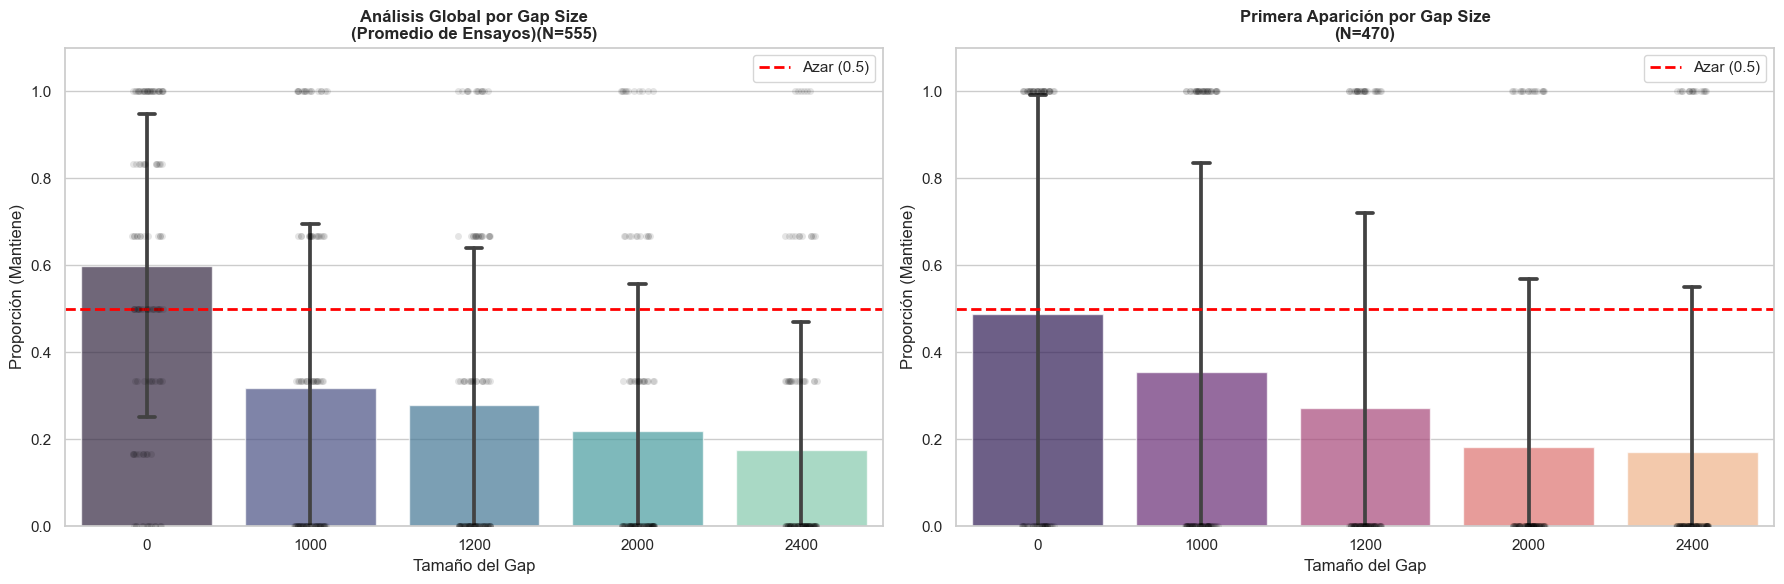

In [12]:
# --- 1. PREPARACIÓN DE DATOS ---

# A. Datos para PROMEDIOS GLOBALES por Gap
cols_gap = [c for c in df_expectativas.columns if c.startswith('Promedio_Gap_')]
df_unicos = df_expectativas.drop_duplicates(subset=['ID_Sujeto'])[['ID_Sujeto'] + cols_gap]
df_plot_global = df_unicos.melt(id_vars='ID_Sujeto', value_vars=cols_gap,
                                var_name='Gap_Col', value_name='Valor')
df_plot_global['Gap'] = df_plot_global['Gap_Col'].str.extract('(\d+)').astype(int)

# B. Datos para PRIMERA APARICIÓN por Gap
df_primera = df_expectativas.drop_duplicates(subset=['ID_Sujeto', 'Gap_Size'], keep='first').copy()

# --- 2. GENERACIÓN DE TABLAS (Comparación vs 0.5) ---

print("--- TABLA 1: PROMEDIO GLOBAL POR GAP VS AZAR ---")
t1 = df_plot_global.groupby('Gap')['Valor'].agg(['count', 'mean', 'std']).reset_index()
t1['Diff_vs_50%'] = (t1['mean'] - 0.5).round(3)
print(t1.round(3).to_string(index=False))

print("\n--- TABLA 2: PRIMERA APARICIÓN POR GAP VS AZAR ---")
t2 = df_primera.groupby('Gap_Size')['Mantiene'].agg(['count', 'mean', 'std']).reset_index()
t2['Diff_vs_50%'] = (t2['mean'] - 0.5).round(3)
print(t2.round(3).to_string(index=False))

# --- 3. VISUALIZACIÓN INTEGRADA ---

sns.set_theme(style="whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# GRÁFICO 1: ANÁLISIS GLOBAL (Promedio de todos los ensayos)
sns.barplot(data=df_plot_global, x='Gap', y='Valor', errorbar='sd', 
            capsize=.1, palette='mako', alpha=0.7, ax=ax1)
sns.stripplot(data=df_plot_global, x='Gap', y='Valor', color='black', 
              alpha=0.1, jitter=True, ax=ax1)
ax1.axhline(0.5, color='red', linestyle='--', linewidth=2, label='Azar (0.5)')
ax1.set_title('Análisis Global por Gap Size\n(Promedio de Ensayos)(N=555)', fontsize=12, fontweight='bold')

# GRÁFICO 2: PRIMERA APARICIÓN (Reacción inicial al costo)
sns.barplot(data=df_primera, x='Gap_Size', y='Mantiene', errorbar='sd', 
            capsize=.1, palette='magma', alpha=0.7, ax=ax2)
sns.stripplot(data=df_primera, x='Gap_Size', y='Mantiene', color='black', 
              alpha=0.1, jitter=True, ax=ax2)
ax2.axhline(0.5, color='red', linestyle='--', linewidth=2, label='Azar (0.5)')
ax2.set_title('Primera Aparición por Gap Size\n(N=470)', fontsize=12, fontweight='bold')

# Ajustes comunes
for ax in [ax1, ax2]:
    ax.set_ylabel('Proporción (Mantiene)')
    ax.set_xlabel('Tamaño del Gap')
    ax.set_ylim(0, 1.1)
    ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
df_exp_mant = df[df['Expectativa_Activa'] == 1].copy()
df_exp_rev = df[df['Expectativa_Activa'] == -1].copy()

--- TABLA 1: PROMEDIOS GENERALES (E.S) ---
           count   mean    std
Condicion                     
CON           59  0.475  0.255
SIN           59  0.500  0.284
DIST          59  0.449  0.265

--- TABLA 2: PRIMERA RESPUESTA (Bloque 1) (E.S) ---
Mantiene    0   1  %_Mantiene
Condicion                    
CON        12  19       61.29
SIN        12  19       61.29
DIST        9  22       70.97

--- TABLA 3: ANÁLISIS DEL DELTA (CON - SIN) (I.S)---
count     59.000
mean      -0.025
std        0.195
median     0.000
min       -0.333
max        0.667
Name: Delta_Mantiene, dtype: float64


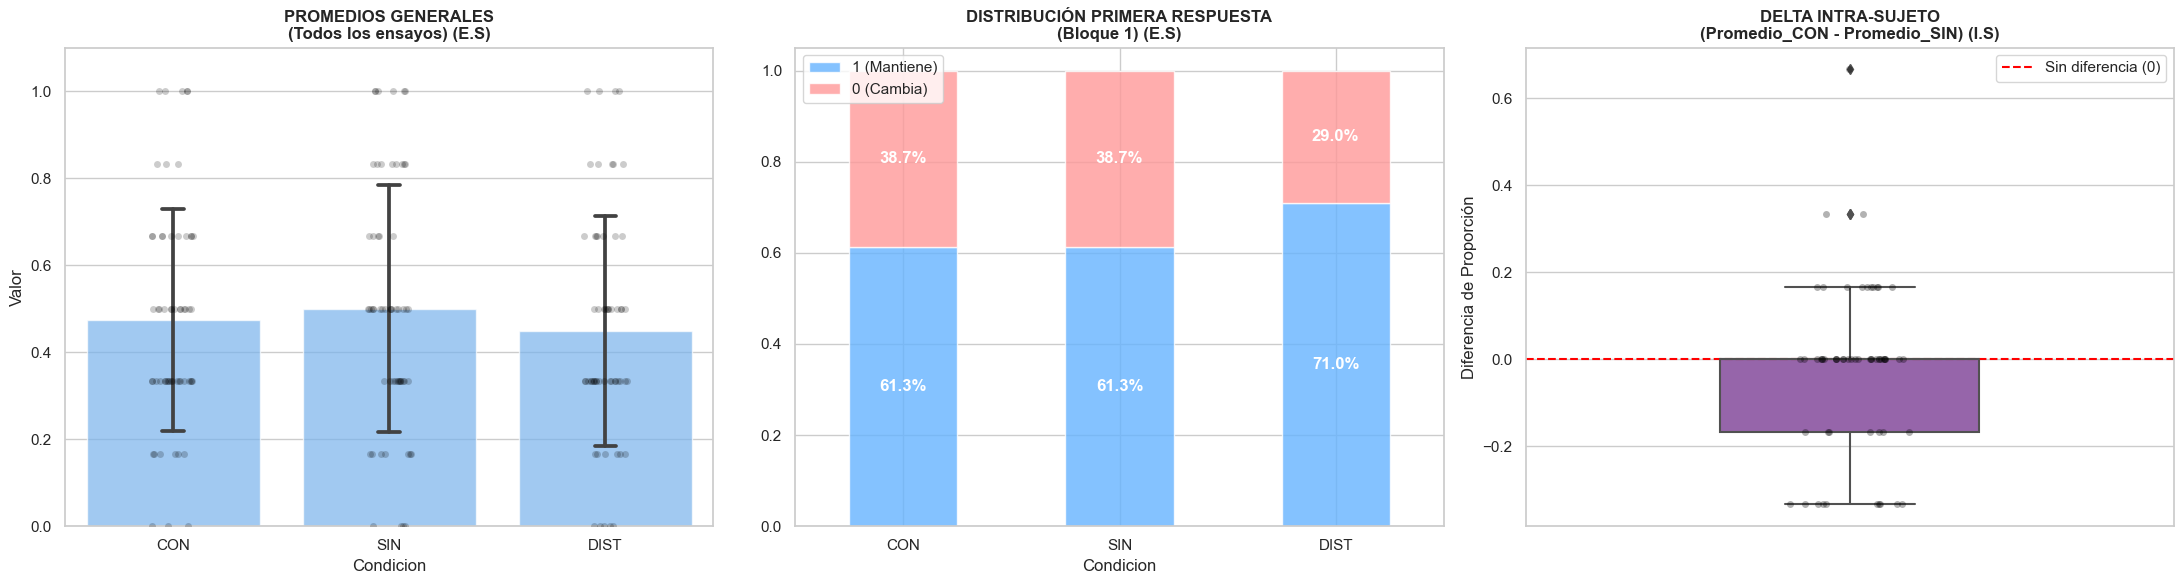

In [15]:
# --- 1. PREPARACIÓN DE DATOS ---

# A. Para el gráfico de PROMEDIOS GENERALES
df_unicos = df_exp_mant.drop_duplicates(subset=['ID_Sujeto']).copy()
df_proms = df_unicos.melt(id_vars='ID_Sujeto', 
                          value_vars=['Promedio_CON', 'Promedio_SIN', 'Promedio_DIST'],
                          var_name='Condicion', value_name='Valor')
df_proms['Condicion'] = df_proms['Condicion'].str.replace('Promedio_', '')

# B. Para el gráfico de PRIMERA RESPUESTA (Categoría 1)
df_cat1 = df_exp_mant[df_exp_mant['Categoria'] == 1].copy()
def mapear(n):
    n = str(n).upper()
    return 'CON' if 'CON' in n else 'SIN' if 'SIN' in n else 'DIST' if 'DIST' in n else n
df_cat1['Condicion'] = df_cat1['Dilema'].apply(mapear)

# C. Cálculo del DELTA (CON - SIN)
df_unicos['Delta_Mantiene'] = df_unicos['Promedio_CON'] - df_unicos['Promedio_SIN']

orden = ['CON', 'SIN', 'DIST']

# --- 2. GENERACIÓN DE TABLAS (Sin cambios en contenido) ---

print("--- TABLA 1: PROMEDIOS GENERALES (E.S) ---")
t1 = df_proms.groupby('Condicion')['Valor'].agg(['count', 'mean', 'std']).loc[orden]
print(t1.round(3))

print("\n--- TABLA 2: PRIMERA RESPUESTA (Bloque 1) (E.S) ---")
t2 = pd.crosstab(df_cat1['Condicion'], df_cat1['Mantiene']).loc[orden]
t2['%_Mantiene'] = (t2[1] / (t2[0] + t2[1]) * 100).round(2)
print(t2)

print("\n--- TABLA 3: ANÁLISIS DEL DELTA (CON - SIN) (I.S)---")
resumen_delta = df_unicos['Delta_Mantiene'].agg(['count', 'mean', 'std', 'median', 'min', 'max'])
print(resumen_delta.round(3))

# --- 3. VISUALIZACIÓN (Panel de 3 gráficos) ---

sns.set_theme(style="whitegrid")
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22, 6)) # Aumentamos el ancho total
colores_apilado = ['#66b3ff', '#ff9999']

# GRÁFICO 1: PROMEDIOS GENERALES
sns.barplot(data=df_proms, x='Condicion', y='Valor', order=orden,
            errorbar='sd', capsize=.1, color='#66b3ff', alpha=0.7, ax=ax1)
sns.stripplot(data=df_proms, x='Condicion', y='Valor', order=orden,
              color='black', alpha=0.2, ax=ax1)
ax1.set_title('PROMEDIOS GENERALES\n(Todos los ensayos) (E.S)', fontsize=12, fontweight='bold')
ax1.set_ylim(0, 1.1)

# GRÁFICO 2: DISTRIBUCIÓN APILADA (Primera Respuesta)
tab_prop = df_cat1.groupby('Condicion')['Mantiene'].value_counts(normalize=True).unstack()
tab_prop[[1, 0]].loc[orden].plot(kind='bar', stacked=True, color=colores_apilado, alpha=0.8, ax=ax2, rot=0)

for p in ax2.patches:
    h = p.get_height()
    if h > 0:
        ax2.annotate(f'{h:.1%}', (p.get_x() + p.get_width()/2, p.get_y() + h/2),
                     ha='center', va='center', color='white', fontweight='bold')
ax2.set_title('DISTRIBUCIÓN PRIMERA RESPUESTA\n(Bloque 1) (E.S)', fontsize=12, fontweight='bold')
ax2.legend(['1 (Mantiene)', '0 (Cambia)'], loc='upper left')

# GRÁFICO 3: BOXPLOT DEL DELTA (Diferencia Intra-Sujeto)
sns.boxplot(y=df_unicos['Delta_Mantiene'], color='#9b59b6', width=0.4, fliersize=5, ax=ax3)
sns.stripplot(y=df_unicos['Delta_Mantiene'], color='black', alpha=0.3, jitter=True, ax=ax3)
ax3.axhline(0, color='red', linestyle='--', linewidth=1.5, label='Sin diferencia (0)')
ax3.set_title('DELTA INTRA-SUJETO\n(Promedio_CON - Promedio_SIN) (I.S)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Diferencia de Proporción')
ax3.legend()

plt.tight_layout()
plt.savefig('panel_completo_resultados.png', dpi=300)
plt.show()

--- TABLA 1: PROMEDIOS GENERALES (E.S) ---
           count   mean    std
Condicion                     
CON           89  0.322  0.211
SIN           89  0.318  0.243
DIST          89  0.279  0.202

--- TABLA 2: PRIMERA RESPUESTA (Bloque 1) (E.S) ---
Mantiene    0   1  %_Mantiene
Condicion                    
CON        51  14       21.54
SIN        48  17       26.15
DIST       57   8       12.31

--- TABLA 3: ANÁLISIS DEL DELTA (CON - SIN) (I.S)---
count     89.000
mean       0.004
std        0.218
median     0.000
min       -1.000
max        0.667
Name: Delta_Mantiene, dtype: float64


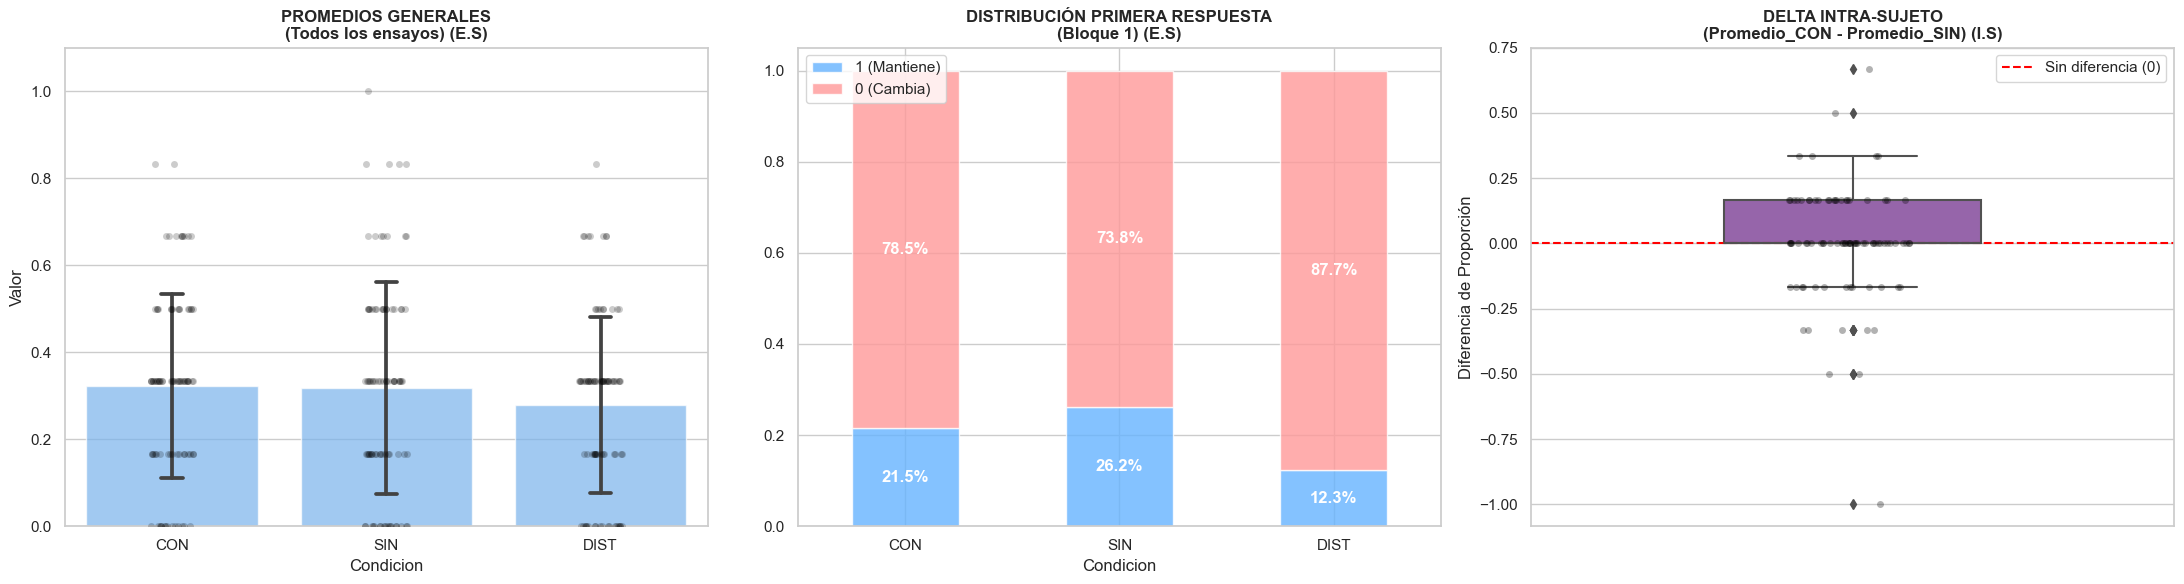

In [16]:
# --- 1. PREPARACIÓN DE DATOS ---

# A. Para el gráfico de PROMEDIOS GENERALES
df_unicos = df_exp_rev.drop_duplicates(subset=['ID_Sujeto']).copy()
df_proms = df_unicos.melt(id_vars='ID_Sujeto', 
                          value_vars=['Promedio_CON', 'Promedio_SIN', 'Promedio_DIST'],
                          var_name='Condicion', value_name='Valor')
df_proms['Condicion'] = df_proms['Condicion'].str.replace('Promedio_', '')

# B. Para el gráfico de PRIMERA RESPUESTA (Categoría 1)
df_cat1 = df_exp_rev[df_exp_rev['Categoria'] == 1].copy()
def mapear(n):
    n = str(n).upper()
    return 'CON' if 'CON' in n else 'SIN' if 'SIN' in n else 'DIST' if 'DIST' in n else n
df_cat1['Condicion'] = df_cat1['Dilema'].apply(mapear)

# C. Cálculo del DELTA (CON - SIN)
df_unicos['Delta_Mantiene'] = df_unicos['Promedio_CON'] - df_unicos['Promedio_SIN']

orden = ['CON', 'SIN', 'DIST']

# --- 2. GENERACIÓN DE TABLAS (Sin cambios en contenido) ---

print("--- TABLA 1: PROMEDIOS GENERALES (E.S) ---")
t1 = df_proms.groupby('Condicion')['Valor'].agg(['count', 'mean', 'std']).loc[orden]
print(t1.round(3))

print("\n--- TABLA 2: PRIMERA RESPUESTA (Bloque 1) (E.S) ---")
t2 = pd.crosstab(df_cat1['Condicion'], df_cat1['Mantiene']).loc[orden]
t2['%_Mantiene'] = (t2[1] / (t2[0] + t2[1]) * 100).round(2)
print(t2)

print("\n--- TABLA 3: ANÁLISIS DEL DELTA (CON - SIN) (I.S)---")
resumen_delta = df_unicos['Delta_Mantiene'].agg(['count', 'mean', 'std', 'median', 'min', 'max'])
print(resumen_delta.round(3))

# --- 3. VISUALIZACIÓN (Panel de 3 gráficos) ---

sns.set_theme(style="whitegrid")
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22, 6)) # Aumentamos el ancho total
colores_apilado = ['#66b3ff', '#ff9999']

# GRÁFICO 1: PROMEDIOS GENERALES
sns.barplot(data=df_proms, x='Condicion', y='Valor', order=orden,
            errorbar='sd', capsize=.1, color='#66b3ff', alpha=0.7, ax=ax1)
sns.stripplot(data=df_proms, x='Condicion', y='Valor', order=orden,
              color='black', alpha=0.2, ax=ax1)
ax1.set_title('PROMEDIOS GENERALES\n(Todos los ensayos) (E.S)', fontsize=12, fontweight='bold')
ax1.set_ylim(0, 1.1)

# GRÁFICO 2: DISTRIBUCIÓN APILADA (Primera Respuesta)
tab_prop = df_cat1.groupby('Condicion')['Mantiene'].value_counts(normalize=True).unstack()
tab_prop[[1, 0]].loc[orden].plot(kind='bar', stacked=True, color=colores_apilado, alpha=0.8, ax=ax2, rot=0)

for p in ax2.patches:
    h = p.get_height()
    if h > 0:
        ax2.annotate(f'{h:.1%}', (p.get_x() + p.get_width()/2, p.get_y() + h/2),
                     ha='center', va='center', color='white', fontweight='bold')
ax2.set_title('DISTRIBUCIÓN PRIMERA RESPUESTA\n(Bloque 1) (E.S)', fontsize=12, fontweight='bold')
ax2.legend(['1 (Mantiene)', '0 (Cambia)'], loc='upper left')

# GRÁFICO 3: BOXPLOT DEL DELTA (Diferencia Intra-Sujeto)
sns.boxplot(y=df_unicos['Delta_Mantiene'], color='#9b59b6', width=0.4, fliersize=5, ax=ax3)
sns.stripplot(y=df_unicos['Delta_Mantiene'], color='black', alpha=0.3, jitter=True, ax=ax3)
ax3.axhline(0, color='red', linestyle='--', linewidth=1.5, label='Sin diferencia (0)')
ax3.set_title('DELTA INTRA-SUJETO\n(Promedio_CON - Promedio_SIN) (I.S)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Diferencia de Proporción')
ax3.legend()

plt.tight_layout()
plt.savefig('panel_completo_resultados.png', dpi=300)
plt.show()

In [ ]:
a